## In this project, we use socioeconomic and healthcare data for different countries to categorize/cluster countries into different groups. The groups represent how dire is their need for international aid and it will help decide how much resources should be allocated to each countries.

Data source: https://kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data (MIT License)

### Data columns and their description

Column Name	|Description|
-----|-----|
country|Name of the country|
child_mort|Death of children under 5 years of age per 1000 live births|
exports|Exports of goods and services per capita. Given as %age of the GDP per capita|
health|Total health spending per capita. Given as %age of GDP per capita|
imports|Imports of goods and services per capita. Given as %age of the GDP per capita|
income|Net income per person (\$)|
inflation|The measurement of the annual growth rate of the Total GDP|
life_expec|The average number of years a new born child would live if the current mortality patterns are to remain the same|
total_fer|The number of children that would be born to each woman if the current age-fertility rates remain the same|
gdpp|The GDP per capita. Calculated as the Total GDP divided by the total population (\$)|


💭
### Questions to reflect upon when completing this project

#### Who are the stakeholders for this project?
#### Are there any ethical concerns regarding this project?
#### What are the initial observations made when exploring the dataset?
#### What are we trying to accomplish?

### Import the necessary libraries

In [1]:
#To avoid any memory leaking with KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
#importing necessary libraries related to data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# making the plots interactive
%matplotlib notebook

### Load dataset

In [4]:
df = pd.read_csv(r'D:\ML_projects\CountryData\Country-data.csv') #Importing the data file

In [5]:
df.head(10)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5            Argentina        14.5     18.9    8.10     16.0   18700   
6              Armenia        18.1     20.8    4.40     45.3    6700   
7            Australia         4.8     19.8    8.73     20.9   41400   
8              Austria         4.3     51.3   11.00     47.8   43200   
9           Azerbaijan        39.2     54.3    5.88     20.7   16000   

   inflation  life_expec  total_fer   gdpp  
0      9.440        56.2       5.82    553  
1      4.490        76.3       1.65   4090  
2     16.100        76.5       2.89   4460  
3     22.400        60.1       6.16   3530  
4      1.440        76.8       2.13  12200  
5     20.900        75.8       2.37  10300  
6      7.770        73.3       1.69   3220  
7      1.160        82.0       1.93  51900  
8      0.873        80.5       1.44  46900  
9     13.800        69.1       1.92   5840

## Early Data Exploration and Analysis

Understanding the dataset and look for any errors/missing values or duplicates.

In [6]:
#shape of the dataset
df.shape

(167, 10)

The number of rows represents the different countries present in this dataset. So, there are 167 countries to categorize/cluster.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Let us convert income and gdpp data types to float64 for better arthimetic operations and statistical analysis.

In [8]:
df['income'] = df['income'].astype('float64')
df['gdpp'] = df['gdpp'].astype('float64')

In [9]:
# verify datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [10]:
#display all columns
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Descriptive Statistics about the data

In [11]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Check for missing values

In [12]:
# creating a boolean column with missing data entry
mask = df.isna().any(axis=1)
df[mask] #output df where mask == True or missing data entry

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

**There are no missing values. Let's check for duplicated columns. In this case, it would be more reasonable to check duplicates for column " country" only. Since, even with different columns, if country is same for any two or more rows, it is problematic.**

In [13]:
# we create mask of duplicates
duplicate = df['country'].duplicated()
df[duplicate] #printing out the columns where duplicate == True.

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

**This shows us that all the data rows are for distinct countries which we wanted.**

### Let us visualize the distribution of different features and also see which country has the best/worst case

In [14]:
import matplotlib.colors as mcolors

<IPython.core.display.Javascript object>


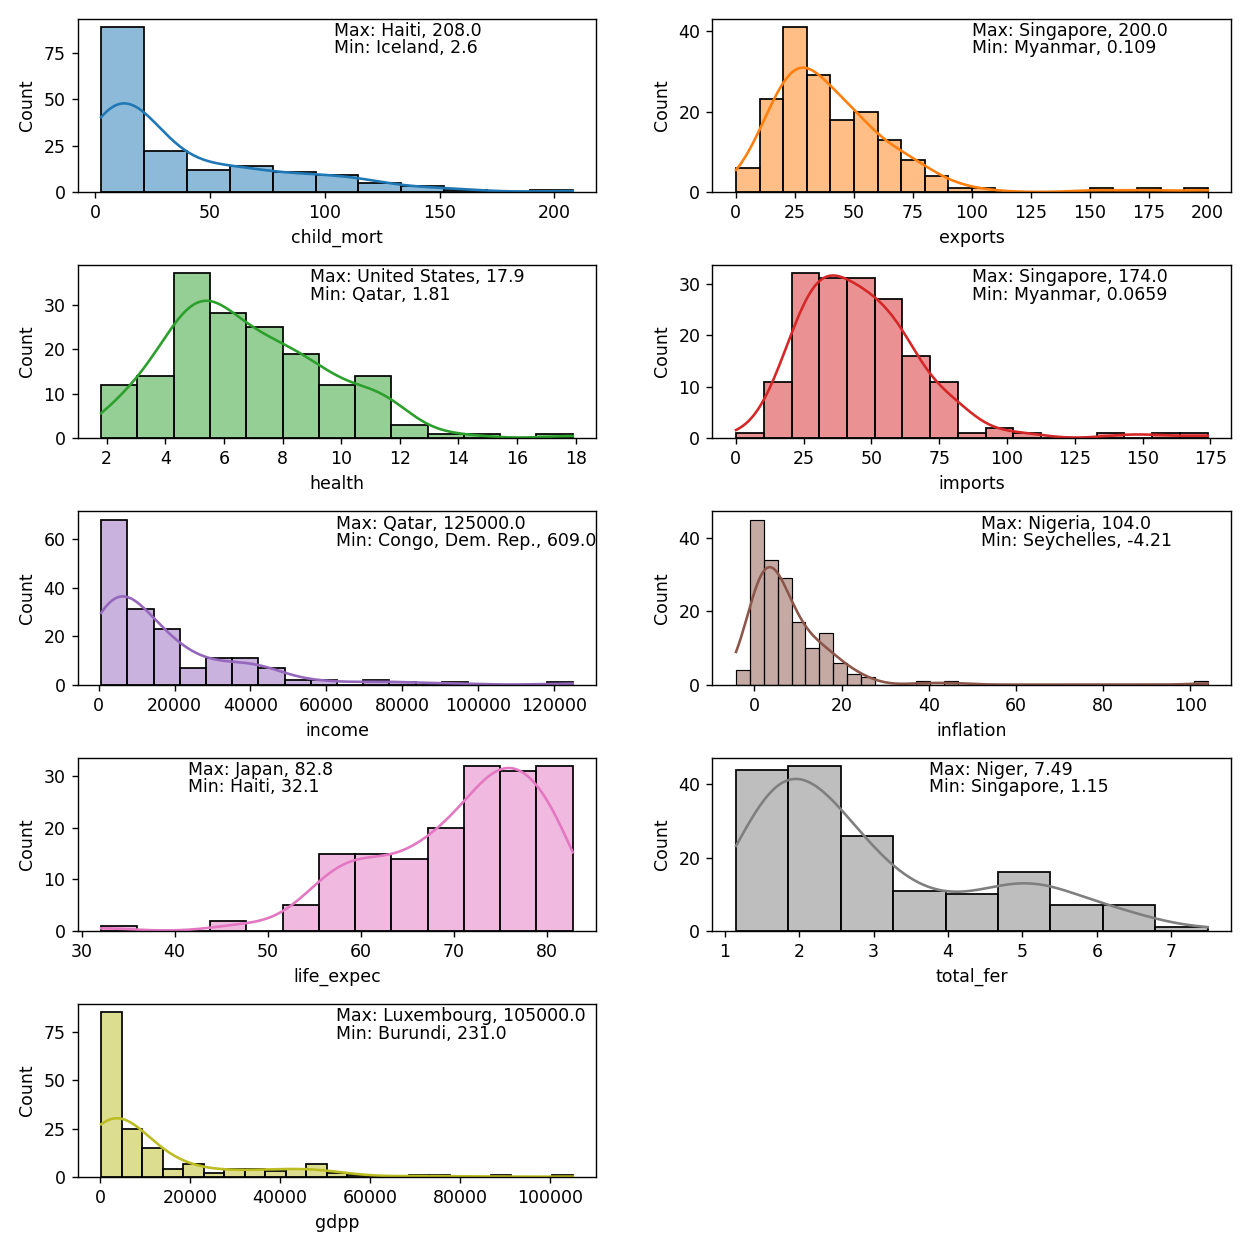

In [15]:
palette = sns.color_palette("tab10") #importing a color palette

# Filter out numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Calculate the number of rows and columns needed
num_plots = len(numeric_columns)
num_rows = (num_plots - 1) // 2 + 1  # Number of rows
num_cols = min(num_plots, 2)         # Number of columns

# Assuming df is your DataFrame containing the data
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Iterate over each numeric column
for i, column in enumerate(numeric_columns):
    row = i // num_cols  # Calculate row index
    col = i % num_cols   # Calculate column index
    
    # Plot histogram for the current numeric column
    sns.histplot(df[column], kde=True, color=palette[i], ax=ax[row, col])
    
    # Find index of maximum and minimum values in the current column
    idx_max = df[column].idxmax()
    idx_min = df[column].idxmin()

    # Annotate maximum and minimum values
    ax[row, col].text(df[column].max() * 0.5, ax[row, col].get_ylim()[1] * 0.9,
                      f"Max: {df.loc[idx_max, 'country']}, {df.loc[idx_max, column]}",
                      horizontalalignment='left')
    ax[row, col].text(df[column].max() * 0.5, ax[row, col].get_ylim()[1] * 0.80,
                      f"Min: {df.loc[idx_min, 'country']}, {df.loc[idx_min, column]}",
                      
                      horizontalalignment='left')
fig.delaxes(ax[-1, -1]) # removing the last empty plot
plt.tight_layout();

In [16]:
plt.savefig("D:\\ML_projects\\CountryAid\\Features_Histogram.pdf")

*We see that a lot of these distributions are highly skewed but we do not change or remove outliers in this study since we want to include all the countries.*

### Let us look the relationships between different features in the dataset



<IPython.core.display.Javascript object>


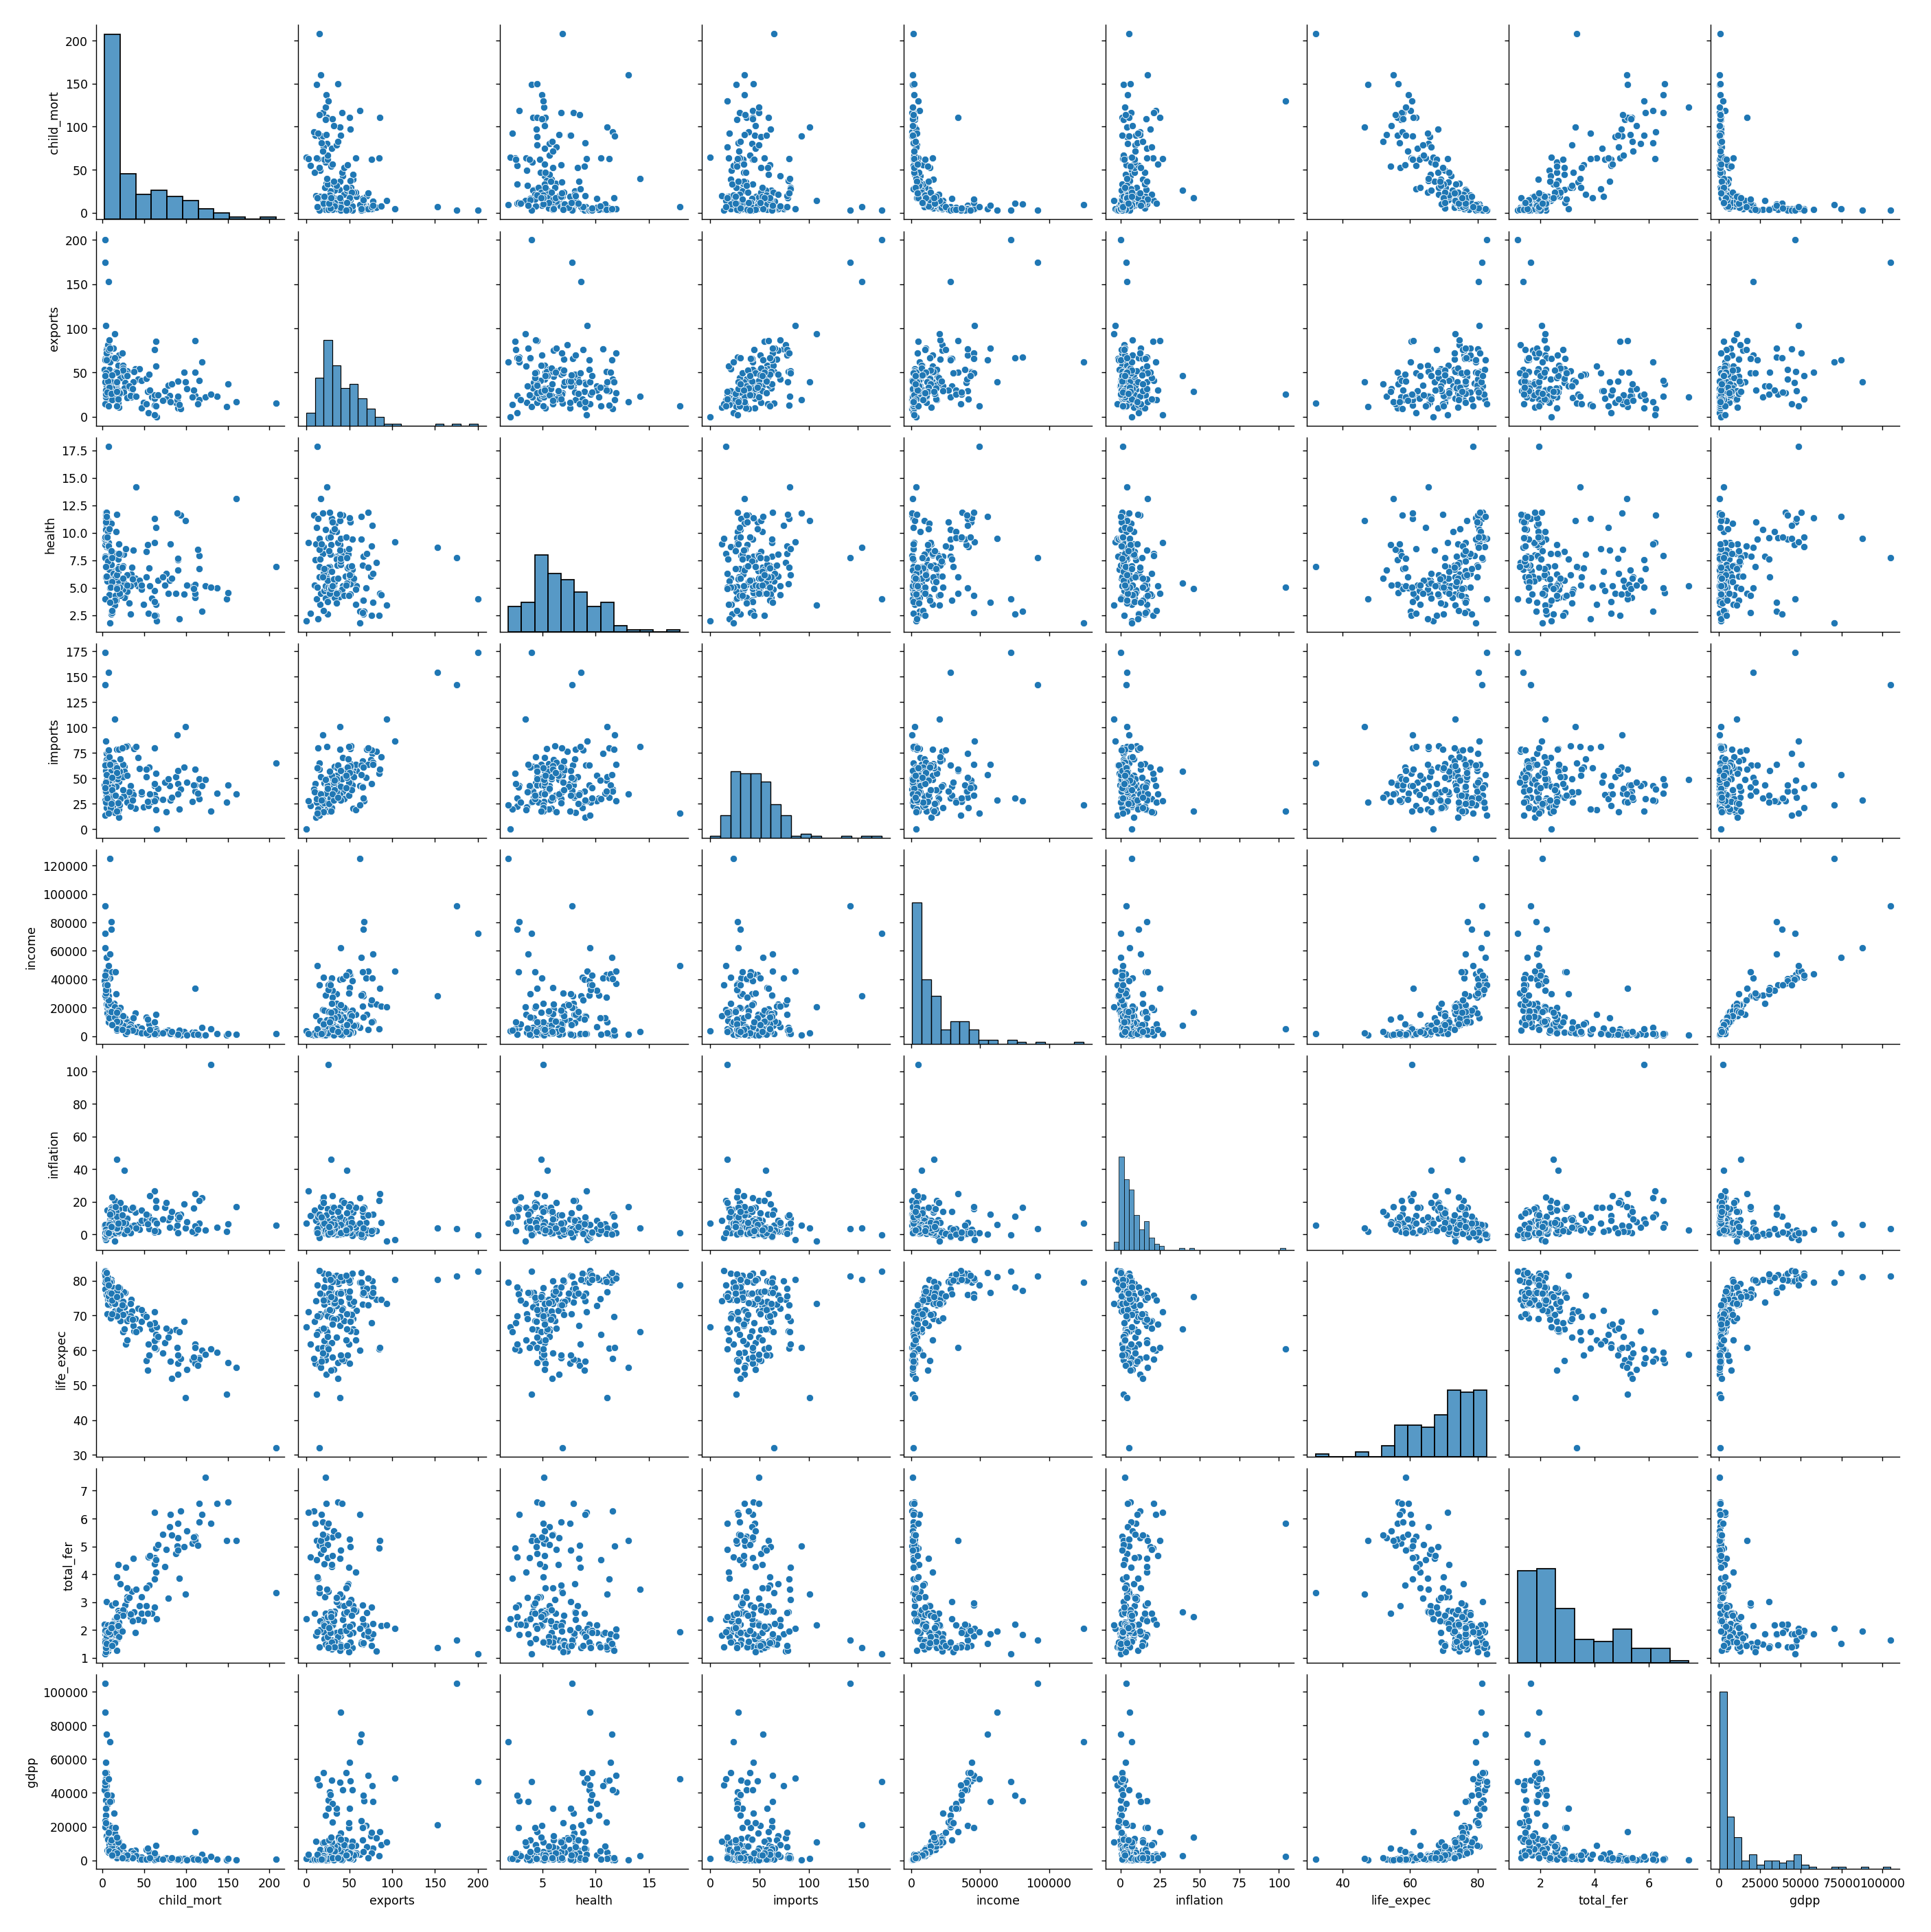

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [17]:
sns.pairplot(df)

Some features seem to have positive or negative correlatins. Let us look at correlation matrix to understand it better.

A linear relationship between income and gdpp makes sense since a country with higher gdp will have productive and higher earning population. 
There is some linear relationship between child_mort and total_fert. This can be due to various reasons such as higher birth rate in less developed countries leading to worse medical care especially due to higher number of birth and scarce medical facilities. The other features appear to be fairly uncorrelated. Let us look at correlation matrix to get a better measure.

In [18]:
df_corr = df.drop(columns ='country')
corr_mat = df_corr.corr()

In [19]:
df_corr.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1        16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2        27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3       119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4        10.3     45.5    6.03     58.9  19100.0       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0

<IPython.core.display.Javascript object>


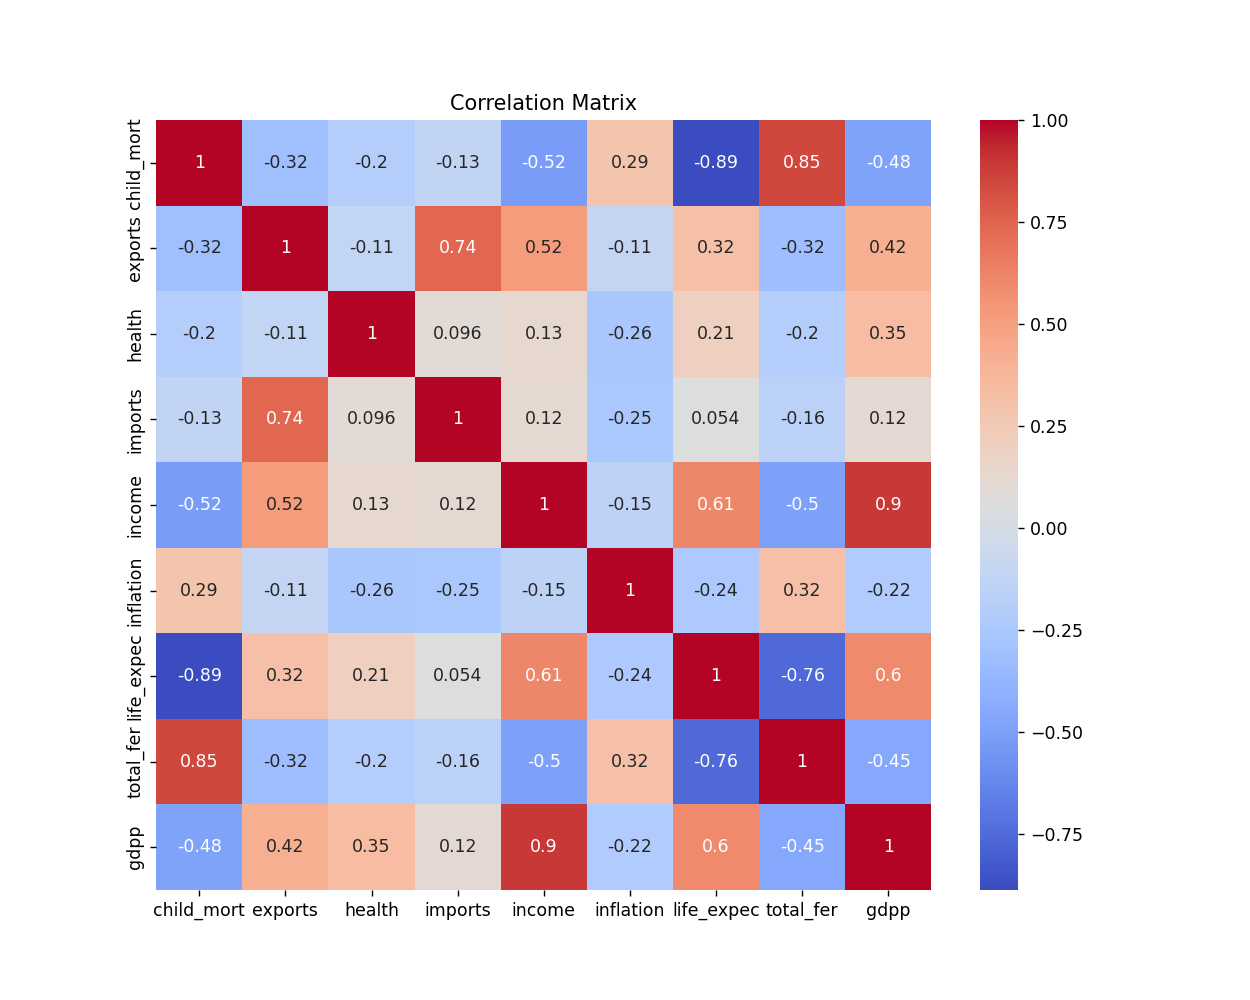

In [20]:
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap= 'coolwarm', ax= ax)
ax.set_title('Correlation Matrix');

The high correlation between *child_mort* and *life_expec* indicates that it is likely due to lack of proper healthcare which contributes to both. Additionally, high correlation of *total_fert* with these features indicate lack of awareness family planning. All these indicate a measure of overall development status of a country.

### For these highly correlated features, we can use PCA dimensionality reduction to avoid the problem of multicollinearity.

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [22]:
# let us set the country data as index for the dataframe
df1 = df.set_index('country').copy()

**Let us find the number of principal axes that will capture most of the variance in the data. Reduced dimensions will also help us visualize clusters more easily.**

<IPython.core.display.Javascript object>


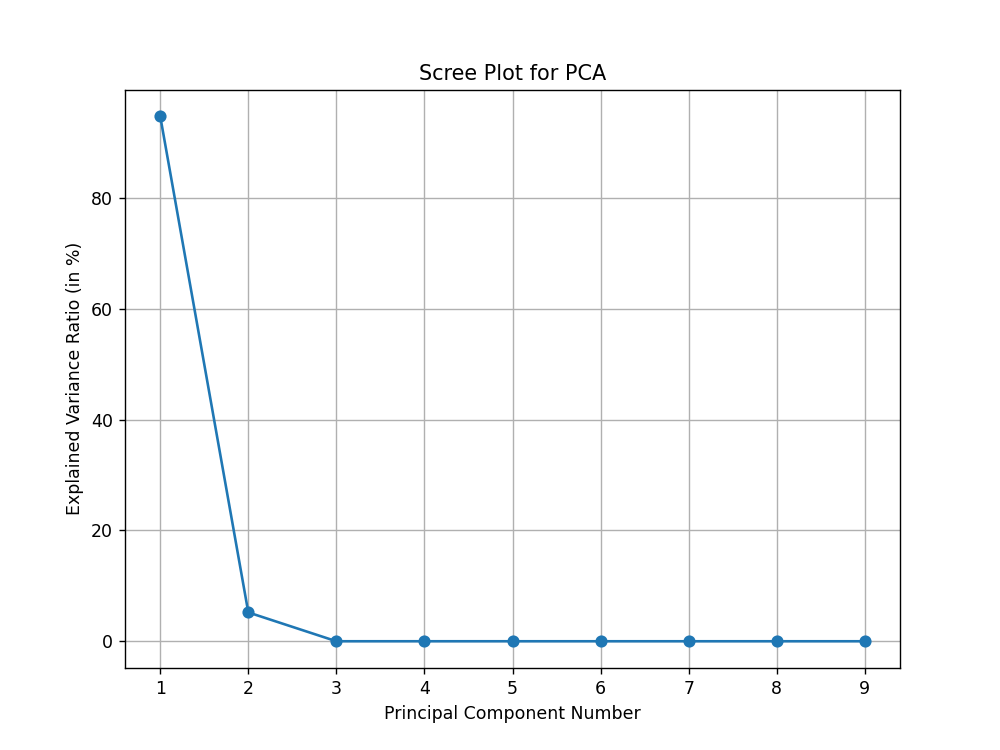

In [23]:
explained_variance_ratios = []

# Loop over different values of n_components
# Initialize PCA with the maximum number of components possible
pca = PCA(n_components=9)

# Fit PCA to your data
pca.fit(df1)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


# Plot the Scree Plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(1, len(explained_variance_ratio) + 1), 100*explained_variance_ratio, marker='o', linestyle='-')

ax.set_title('Scree Plot for PCA')
ax.set_xlabel('Principal Component Number')
ax.set_ylabel('Explained Variance Ratio (in %)')
ax.grid(True)


### We see that principal components 1 & 2 capture almost 100% of the variance in data. so we can proceed with 2 principal components.

In [24]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df1)

### Let us perform K-means clustering on the on the dimensionality reduced dataframe

**Before we perfrom clustering, let us use elbow method to find the ideal number of clusters. The context of the problem gives us some idea regarding plausible number of clusters. Given how countries are usually classified as underdeveloped, developing and developed countries, three could be an ideal number of clusters. However, let us see.**

*let us perform elbow method and silhouette test to check for idea number of clusters.*

<IPython.core.display.Javascript object>


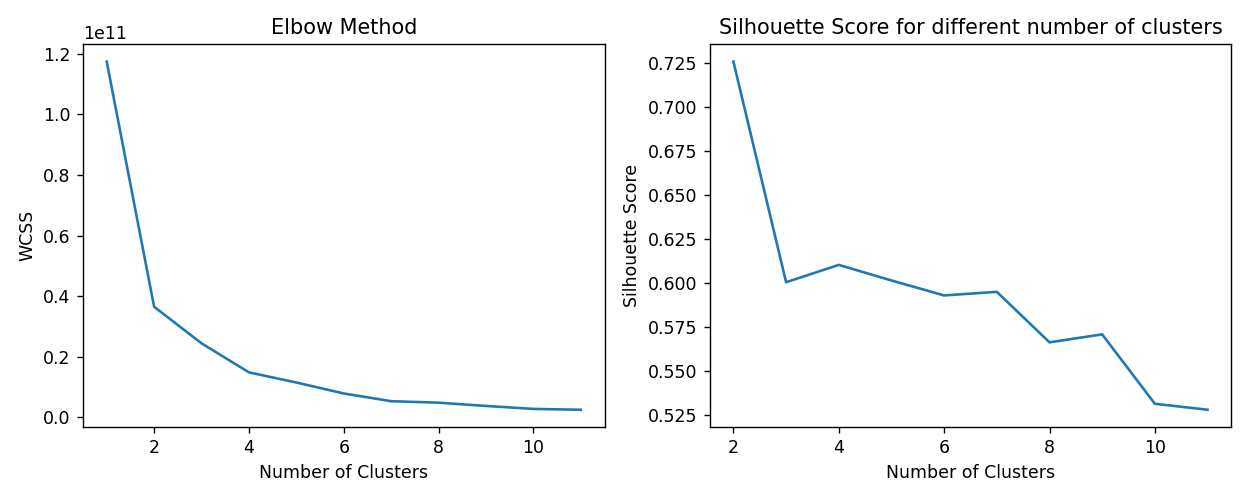

In [25]:
wcss = [] #Within-cluster Sum of squares
for i in range(1, 12):  # trying K from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init='auto', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS

# Plot the elbow curve
fig,ax =  plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ax[0].plot(range(1, 12), wcss)
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('WCSS');

sil_score = []
cluster_range = range(2,12)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters,init='k-means++',n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    sil_avg = silhouette_score(X_pca, cluster_labels)
    sil_score.append(sil_avg)

ax[1].plot(cluster_range, sil_score)
ax[1].set_title('Silhouette Score for different number of clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()

**Based on these tests, 4 appears to be the best choice for the number of clusters. This is also a reasobale number of categories/clusters for the context.**

In [26]:
# let us perform K means clustering and add the cluster details as a new column to the dataframe.
kmeans = KMeans(n_clusters = 4, n_init= 'auto', random_state= 42)
cluster_labels = kmeans.fit_predict(X_pca) # fitting the dimensions reduced dataframe.
df1['cluster_kmeans'] = cluster_labels # adding the cluster number to the original dataframe, cluster number starts from 0.

In [27]:
df1.head(10)

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0      9.440   
Albania                    16.6     28.0    6.55     48.6   9930.0      4.490   
Algeria                    27.3     38.4    4.17     31.4  12900.0     16.100   
Angola                    119.0     62.3    2.85     42.9   5900.0     22.400   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0      1.440   
Argentina                  14.5     18.9    8.10     16.0  18700.0     20.900   
Armenia                    18.1     20.8    4.40     45.3   6700.0      7.770   
Australia                   4.8     19.8    8.73     20.9  41400.0      1.160   
Austria                     4.3     51.3   11.00     47.8  43200.0      0.873   
Azerbaijan                 39.2     54.3    5.88     20.7  16000.0     13.800   

                     life_expec  total_fer     gdpp  cluster_kmeans  
country                                                              
Afghanistan                56.2       5.82    553.0               0  
Albania                    76.3       1.65   4090.0               0  
Algeria                    76.5       2.89   4460.0               0  
Angola                     60.1       6.16   3530.0               0  
Antigua and Barbuda        76.8       2.13  12200.0               2  
Argentina                  75.8       2.37  10300.0               2  
Armenia                    73.3       1.69   3220.0               0  
Australia                  82.0       1.93  51900.0               1  
Austria                    80.5       1.44  46900.0               1  
Azerbaijan                 69.1       1.92   5840.0               0

In [28]:
cluster_means = df1.groupby('cluster_kmeans').mean()
cluster_means

child_mort    exports    health    imports        income  \
cluster_kmeans                                                             
0                54.135185  33.257398  6.321574  45.538573   6381.138889   
1                 5.070000  55.105000  9.267500  46.905000  47175.000000   
2                12.102857  52.294286  6.845143  49.337143  25600.000000   
3                 4.875000  85.250000  7.640000  61.900000  83625.000000   

                inflation  life_expec  total_fer          gdpp  
cluster_kmeans                                                  
0                9.204111   66.566667   3.519815   3027.259259  
1                2.890700   80.370000   1.790500  44660.000000  
2                6.595457   76.062857   1.976857  17347.714286  
3                4.216750   81.000000   1.792500  84425.000000

### Let us calculate silhouette score and Davies Bouldin Score for K means clustering with number of clusters, n = 4.

In [29]:
silhouette_score_kmeans = silhouette_score(X_pca, cluster_labels)
print('Silhouette score for KMeans: ', silhouette_score_kmeans)
davies_score_kmeans = davies_bouldin_score(X_pca, cluster_labels)
print('Davies Bouldin score for KMeans: ', davies_score_kmeans)

Silhouette score for KMeans:  0.610297060301881
Davies Bouldin score for KMeans:  0.6840590795734012


### Let us check number of countries in each clusters

In [30]:
df1.value_counts('cluster_kmeans')

cluster_kmeans
0    108
2     35
1     20
3      4
Name: count, dtype: int64

### Visualizing the clusters in two dimensions using PCA components

<IPython.core.display.Javascript object>


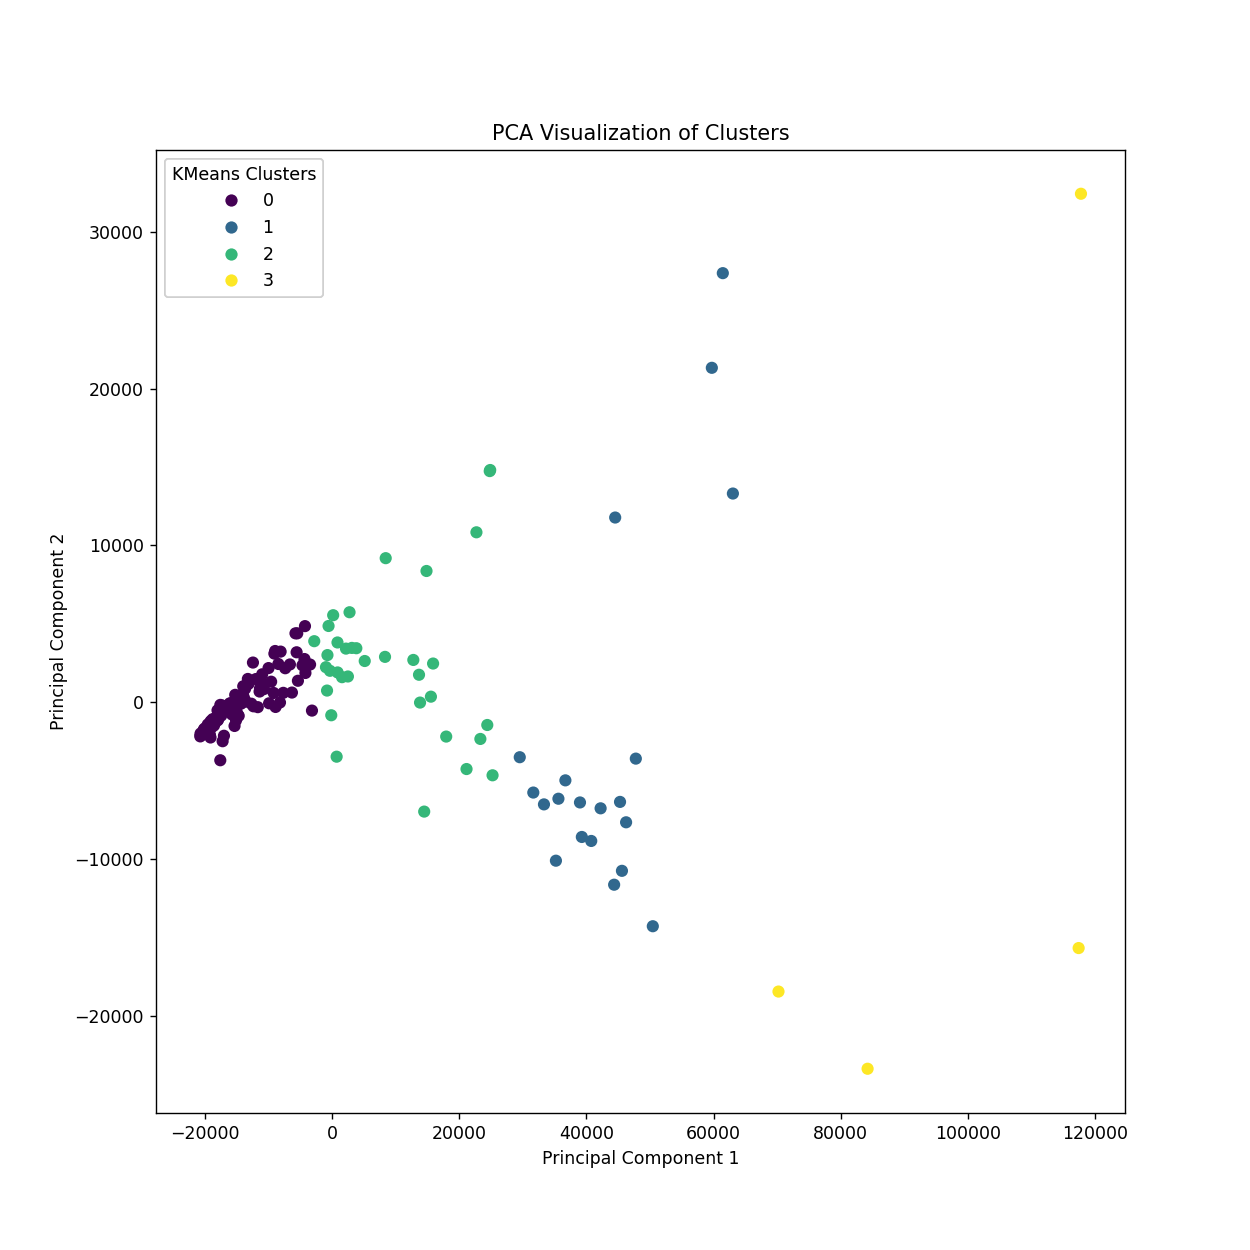

In [31]:
# Plot the clusters


fig, ax = plt.subplots(figsize=(10, 10))


# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['cluster_kmeans'], cmap='viridis')

# Labels and title
ax.set_title('PCA Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='KMeans Clusters')
ax.add_artist(legend)

plt.show()

### It appears from the plot and number of countries in each cluster that 4 categories/clusters are reasonable for this case and for using KMeans model.  There are some countries within the same cluster that are far from each other along the Principal Component 2. However, since principle component only captures ~ 5% of the variance, this is acceptable.

### Let us now try another clustering algorithm Gaussian Mixture Model and see how it performs compared to KMeans. 

In [32]:
#import library for Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

In [33]:
#Instantiate the GMM model
gmm = GaussianMixture(n_components= 3, covariance_type= 'full', random_state= 42 )

In [34]:
# let us make a copy of original data again to work on it
df2 = df.set_index('country').copy()

<IPython.core.display.Javascript object>


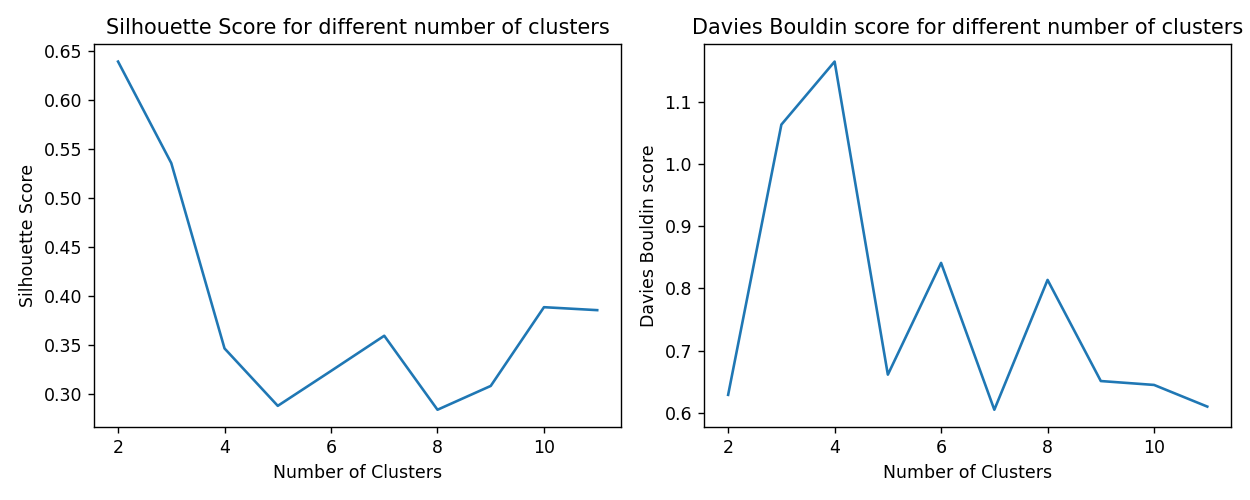

In [35]:
sil_score = []
db_score = []
cluster_range = range(2,12)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components = n_clusters,covariance_type= 'full', random_state=42)
    cluster_labels = gmm.fit_predict(X_pca)
    sil_avg = silhouette_score(X_pca, cluster_labels)
    db_avg = davies_bouldin_score(X_pca, cluster_labels)
    sil_score.append(sil_avg)
    db_score.append(db_avg)

fig,ax =  plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ax[0].plot(cluster_range, sil_score)
ax[0].set_title('Silhouette Score for different number of clusters')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(cluster_range, db_score)
ax[1].set_title('Davies Bouldin score for different number of clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Davies Bouldin score')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


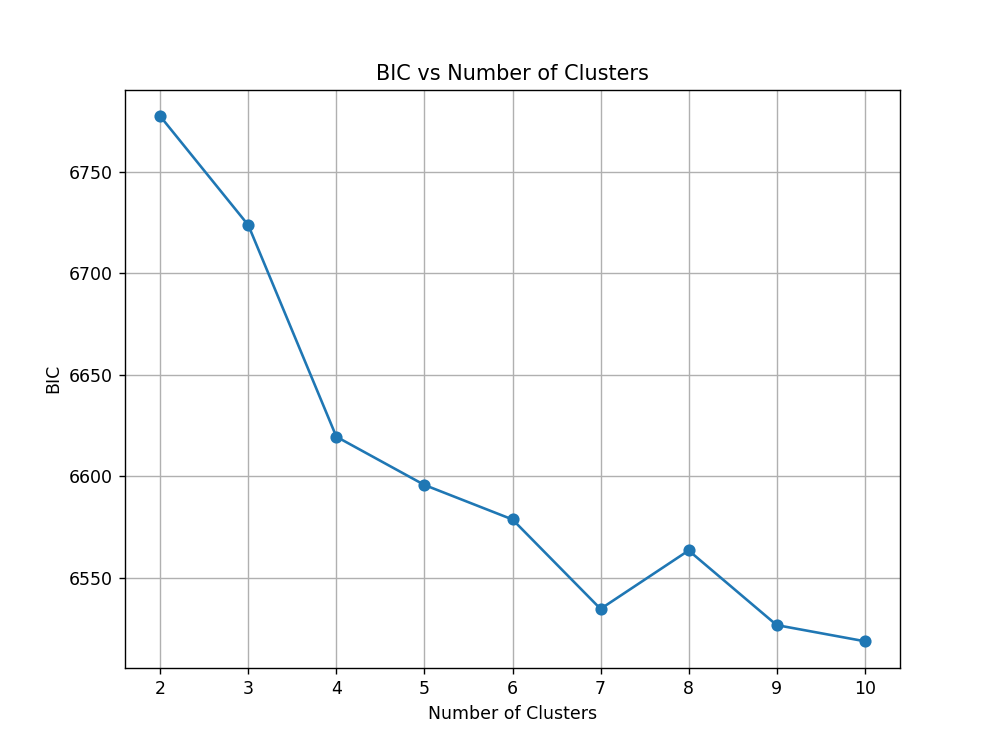

In [36]:
bic = []

# Fit GMMs with different numbers of components and calculate BIC
min_components = 2
max_components = 10
for n_components in range(min_components, max_components + 1):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))

# Plot BIC vs number of clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(min_components, max_components + 1), bic, marker='o', linestyle='-')
ax.set_title('BIC vs Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('BIC')
plt.grid(True)
plt.xticks(np.arange(min_components, max_components + 1))
plt.show()

Considering all these tests together, it would appear that GMM does not perform very well for any number of clusters. Although BIC is lowest for 7, it is likely that some cluster size will become very small. Let's proceed with number of clusters = 4 and see how it performs.

In [37]:
# Let us check model performace for 4 clusters.
gmm = GaussianMixture(n_components= 4, covariance_type= 'full', random_state= 42 )
cluster_labels = gmm.fit_predict(X_pca)

In [38]:
df2['cluster_gmm'] = cluster_labels

In [39]:
df2.value_counts('cluster_gmm')

cluster_gmm
2    77
0    45
1    34
3    11
Name: count, dtype: int64

In [40]:
silhouette_score_gmm = silhouette_score(X_pca, cluster_labels)
print('Silhouette score for GMM: ', silhouette_score_gmm)
davies_score_gmm = davies_bouldin_score(X_pca, cluster_labels)
print('Davies Bouldin score for GMM: ', davies_score_gmm)

Silhouette score for GMM:  0.34622898617121883
Davies Bouldin score for GMM:  1.164448269261793


<IPython.core.display.Javascript object>


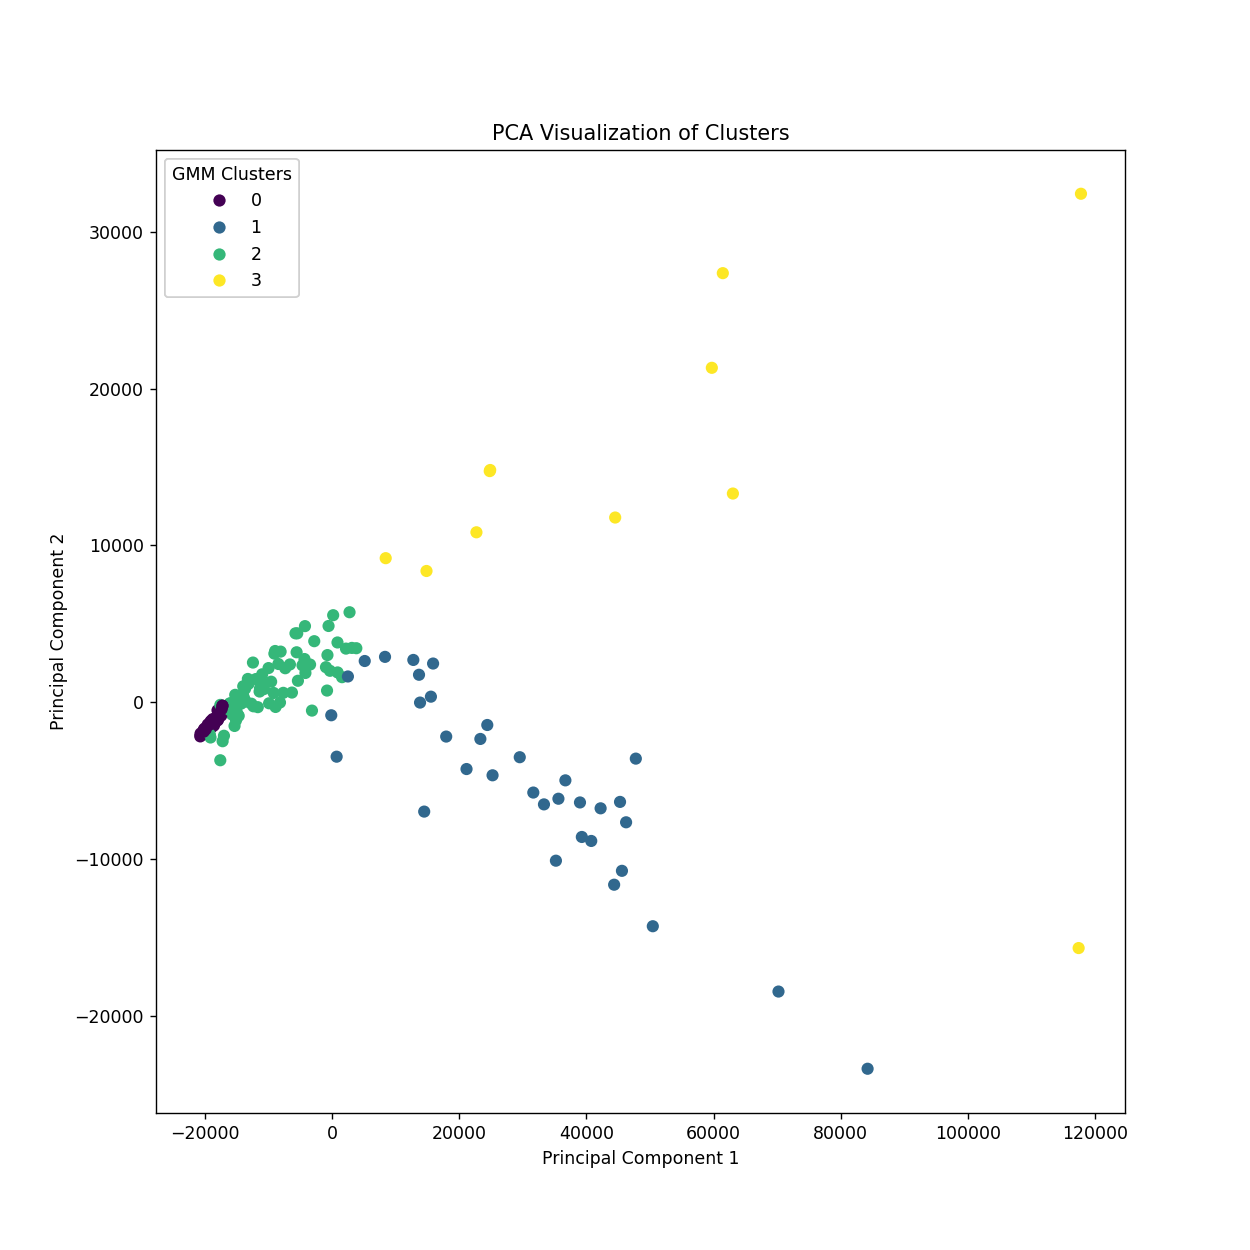

In [41]:
# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))


# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df2['cluster_gmm'], cmap='viridis')

# Labels and title
ax.set_title('PCA Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='GMM Clusters')
ax.add_artist(legend)

plt.show()

**It appears that the model performs decent for distinguishing clusters 1, 2 and 3. However, for cluster 0 and 1, the separation is not well defined. Considering all these factors, KMeans appear to be more suited for clustering on this dataset. Also, in the context of this problem, distinguishing categories of countries based on difference in range of the feature values is important. Given that GMM defines clusters giving heavy importance to principal component 2 which capture very little variance, this model is not ideal for this scenario.**

### Let us try MeanShift and see how well it performs on forming 4 distinct and separate clusters.

In [42]:
from sklearn.cluster import MeanShift

**Let us check the performance of meanshift for different bandwidth range and the number of corresponding clusters.**

For bandwidth=0, Number of clusters: 8, Silhouette Score: 0.6553373932756231,Davies–Bouldin Score: 0.4832856825209122
For bandwidth=5000, Number of clusters: 20, Silhouette Score: 0.49193447156667,Davies–Bouldin Score: 0.3600107242323227
For bandwidth=10000, Number of clusters: 10, Silhouette Score: 0.5718348511201287,Davies–Bouldin Score: 0.3675099846830904
For bandwidth=15000, Number of clusters: 8, Silhouette Score: 0.633363756781841,Davies–Bouldin Score: 0.3482206522459941
For bandwidth=20000, Number of clusters: 6, Silhouette Score: 0.6919860855304384,Davies–Bouldin Score: 0.4058602918549046
For bandwidth=25000, Number of clusters: 4, Silhouette Score: 0.679715558016005,Davies–Bouldin Score: 0.32539419632975536
For bandwidth=30000, Number of clusters: 3, Silhouette Score: 0.6957751247770914,Davies–Bouldin Score: 0.75294447856374
For bandwidth=35000, Number of clusters: 3, Silhouette Score: 0.665358253189161,Davies–Bouldin Score: 0.4535765689290443
For bandwidth=40000, Number of cl

<IPython.core.display.Javascript object>


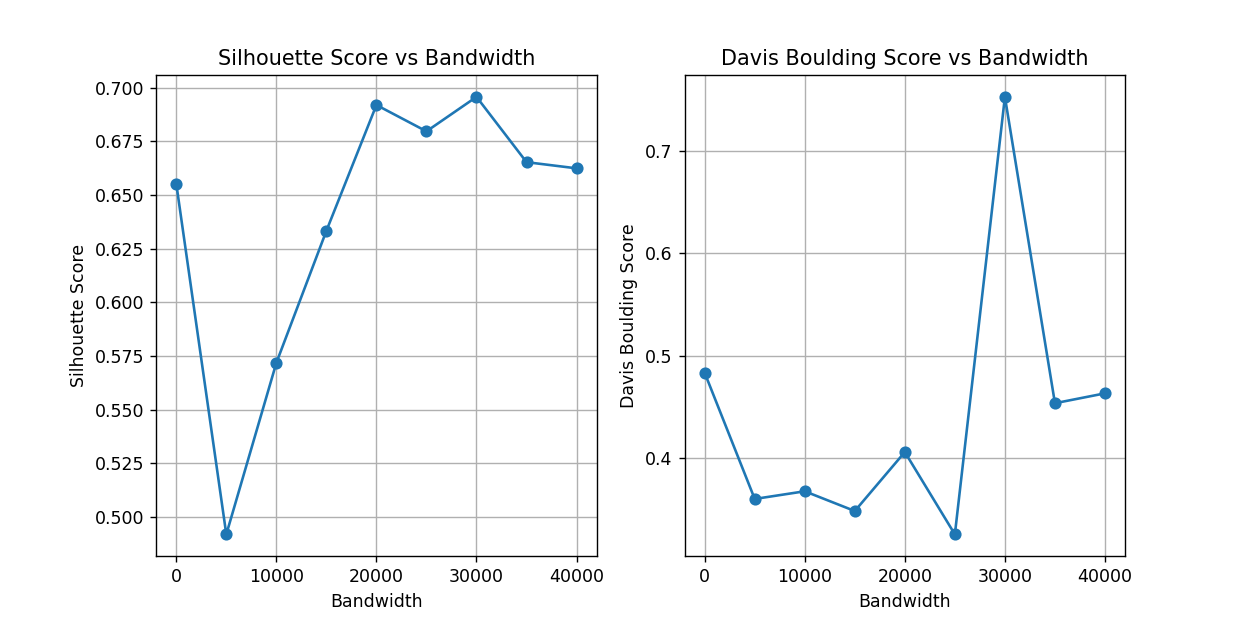

In [43]:
bandwidth_values = np.arange(0, 40001, 5000)

# Initialize lists to store results
num_clusters_list = []
silhouette_scores_list = []
davies_bouldin_scores_list = []
# Iterate over bandwidth values
for bandwidth in bandwidth_values:
    # Create Mean Shift instance with the current bandwidth
    meanshift = MeanShift(bandwidth=bandwidth if bandwidth != 0 else None)
    
    # Fit Mean Shift clustering to data
    labels = meanshift.fit_predict(X_pca)
    
    # Count number of clusters (excluding noise label -1)
    num_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    num_clusters_list.append(num_clusters)
    
    # Calculate silhouette score
    silhouette_score_value = silhouette_score(X_pca, labels)
    silhouette_scores_list.append(silhouette_score_value)
    
    # Calculate Davies–Bouldin index
    davies_bouldin_score_value = davies_bouldin_score(X_pca, labels)
    davies_bouldin_scores_list.append(davies_bouldin_score_value)
    
    
    # Print results
    print(f"For bandwidth={bandwidth}, Number of clusters: {num_clusters}, Silhouette Score: {silhouette_score_value},Davies–Bouldin Score: {davies_bouldin_score_value}")

    
fig, ax =  plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))
# Plot silhouette score vs bandwidth
ax[0].plot(bandwidth_values, silhouette_scores_list, marker='o')
ax[0].set_title('Silhouette Score vs Bandwidth')
ax[0].set_xlabel('Bandwidth')
ax[0].set_ylabel('Silhouette Score')
ax[0].grid(True)
# Set y-axis ticks as integer values

# Plot silhouette score vs bandwidth
ax[1].plot(bandwidth_values, davies_bouldin_scores_list, marker='o')
ax[1].set_title('Davis Boulding Score vs Bandwidth')
ax[1].set_xlabel('Bandwidth')
ax[1].set_ylabel('Davis Boulding Score')
ax[1].grid(True)

### The test scores show that bandwidth = 25000 gives reasonably good results, which again corresponds to 4 clusters.

In [44]:
df3 = df.set_index('country').copy()

In [45]:
meanshift = MeanShift(bandwidth= 25000)

In [46]:
cluster_labels =  meanshift.fit_predict(X_pca)

In [47]:
df3['cluster_ms'] = cluster_labels

In [48]:
df3.head(10)

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0      9.440   
Albania                    16.6     28.0    6.55     48.6   9930.0      4.490   
Algeria                    27.3     38.4    4.17     31.4  12900.0     16.100   
Angola                    119.0     62.3    2.85     42.9   5900.0     22.400   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0      1.440   
Argentina                  14.5     18.9    8.10     16.0  18700.0     20.900   
Armenia                    18.1     20.8    4.40     45.3   6700.0      7.770   
Australia                   4.8     19.8    8.73     20.9  41400.0      1.160   
Austria                     4.3     51.3   11.00     47.8  43200.0      0.873   
Azerbaijan                 39.2     54.3    5.88     20.7  16000.0     13.800   

                     life_expec  total_fer     gdpp  cluster_ms  
country                                                          
Afghanistan                56.2       5.82    553.0           0  
Albania                    76.3       1.65   4090.0           0  
Algeria                    76.5       2.89   4460.0           0  
Angola                     60.1       6.16   3530.0           0  
Antigua and Barbuda        76.8       2.13  12200.0           0  
Argentina                  75.8       2.37  10300.0           0  
Armenia                    73.3       1.69   3220.0           0  
Australia                  82.0       1.93  51900.0           1  
Austria                    80.5       1.44  46900.0           1  
Azerbaijan                 69.1       1.92   5840.0           0

In [49]:
cluster_mean = df3.groupby("cluster_ms").mean()
cluster_mean

child_mort     exports    health     imports         income  \
cluster_ms                                                                
0            43.038356   37.686979  6.530000   46.103191   11605.910959   
1             5.036842   59.242105  9.224211   49.147368   50105.263158   
2             9.000000   62.300000  1.810000   23.800000  125000.000000   
3             2.800000  175.000000  7.770000  142.000000   91700.000000   

            inflation  life_expec  total_fer           gdpp  
cluster_ms                                                   
0            8.409753   69.142466   3.114658    7187.767123  
1            3.218000   80.378947   1.782632   49489.473684  
2            6.980000   79.500000   2.070000   70300.000000  
3            3.620000   81.300000   1.630000  105000.000000

In [50]:
df3.value_counts('cluster_ms')

cluster_ms
0    146
1     19
2      1
3      1
Name: count, dtype: int64

<IPython.core.display.Javascript object>


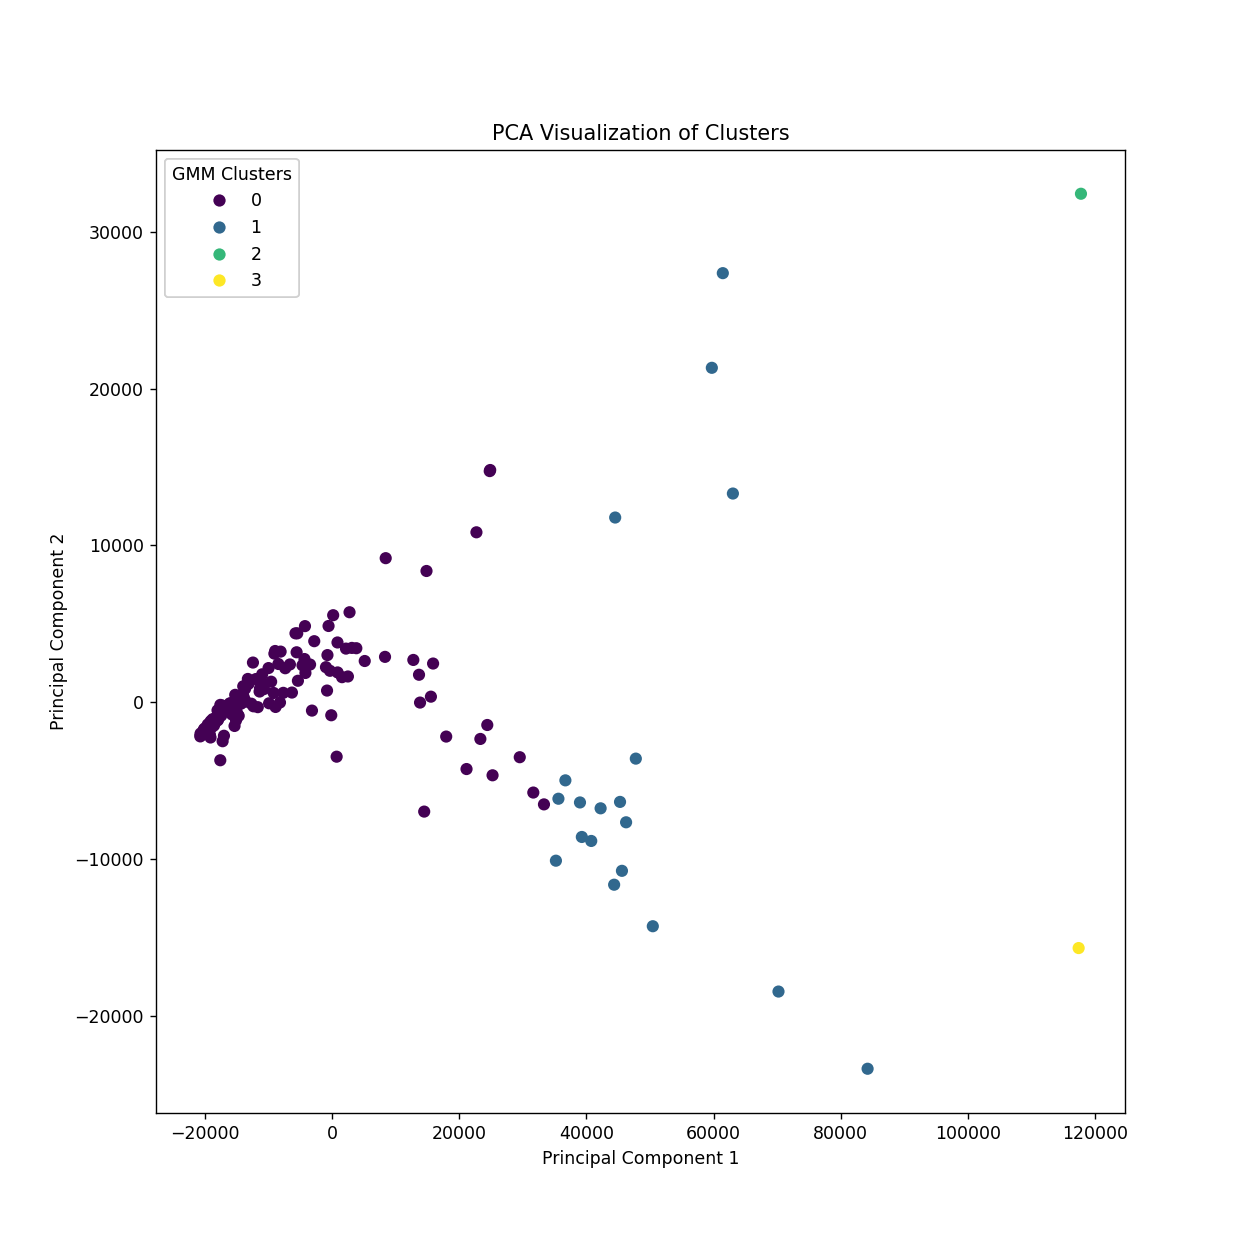

In [51]:
# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))


# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df3['cluster_ms'], cmap='viridis')

# Labels and title
ax.set_title('PCA Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='GMM Clusters')
ax.add_artist(legend)

plt.show()

### Silhouette Score and Davis Boulding score may be helpful often but they do have their limitations. Looking at the cluster size of different clusters and the visualiztion of the clusters, it appears that even though MeanShift has "best scores", the clustering done by this algorithm is not ideal due to most of the countries being put in one cluster and two of the clusters having only 1 country each.

Of all these clustering algorithms, KMeans gives best results. So, we will proceed with it.

Based on the mean values of all the features in each cluster, we can rename the clusters as follows:

In [52]:
cluster_labels = ['Intensive Aid Needed', 'Minimal Aid Needed','Moderate Aid Needed', 'No Aid Needed']

# Replace values in the 'cluster' column with labels
df1['cluster_kmeans'] = df1['cluster_kmeans'].replace({0: cluster_labels[0], 1: cluster_labels[1], 2: cluster_labels[2],3:cluster_labels[3]})


In [53]:
df1.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp        cluster_kmeans  
country                                                                    
Afghanistan                56.2       5.82    553.0  Intensive Aid Needed  
Albania                    76.3       1.65   4090.0  Intensive Aid Needed  
Algeria                    76.5       2.89   4460.0  Intensive Aid Needed  
Angola                     60.1       6.16   3530.0  Intensive Aid Needed  
Antigua and Barbuda        76.8       2.13  12200.0   Moderate Aid Needed

In [54]:
df1.reset_index(inplace=True)

fig = px.choropleth(data_frame = df1,
                   locations = 'country',
                   locationmode='country names',
                   color= 'cluster_kmeans',
                   color_continuous_scale='Viridis',
                   hover_name = 'country',
                   hover_data={'country': False},
                   labels = {'cluster_kmeans':'Status'},
                   title = 'Categorization of Countries on their healthcare and socioeconomic status')
fig.show()

In [55]:
# Save the plot as an HTML file
fig.write_html("D:\\ML_projects\\CountryAid\\interactive_plot_countries_KMeans.html")

### Let us also make a pdf file with lists of countries in each category.

## EXTRA: 
**It would seem that there are many countries in the category of intensive aid needed. It would be helpful to look into category of countries in more detail and see if there are further sub-categories to classify. Doing this will not only help WHO prioritize their aid, but also understand which type of aid is needed where.**

In [56]:
df_int = df1[df1["cluster_kmeans"]=="Intensive Aid Needed"] 

In [57]:
df_int = df_int.drop("cluster_kmeans",axis = 1).set_index("country")

In [58]:
X_int =  pca.fit_transform(df_int)

In [59]:
# Let us perform tests on the subset to see what should be reasonable number of subcategories.

<IPython.core.display.Javascript object>


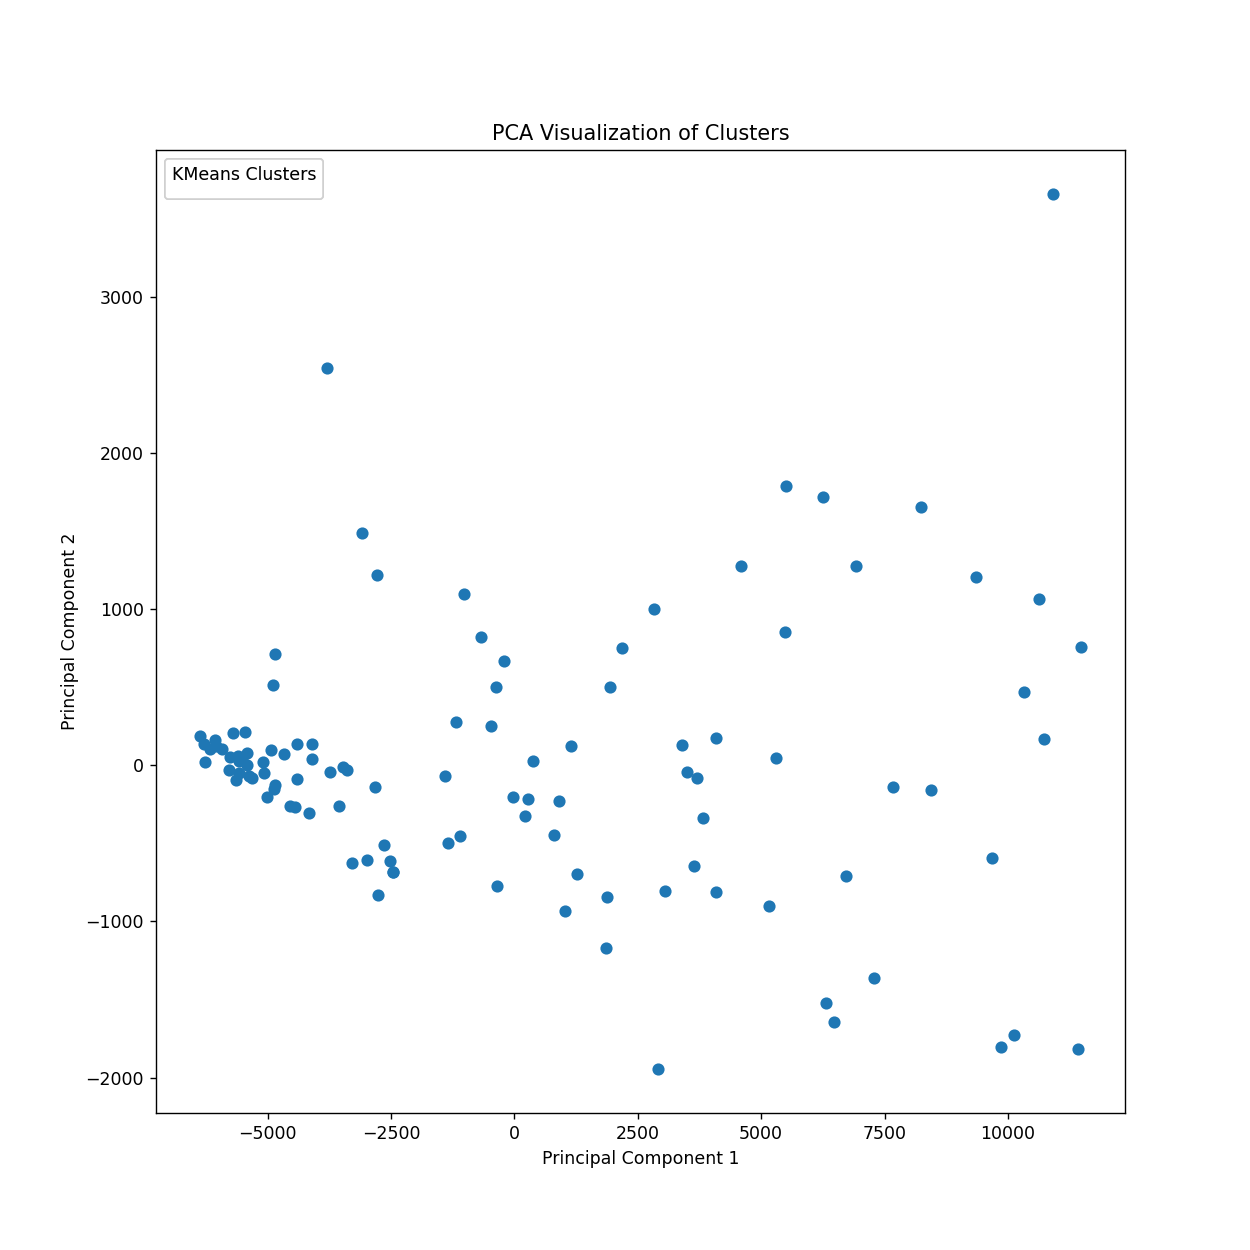

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



In [60]:

fig, ax = plt.subplots(figsize=(10, 10))


# Scatter plot
scatter = ax.scatter(X_int[:, 0], X_int[:, 1])

# Labels and title
ax.set_title('PCA Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='KMeans Clusters')
ax.add_artist(legend)

plt.show()

There appears to be two different clusers below and above Principal Component 1. Let us also perform other tests.

<IPython.core.display.Javascript object>


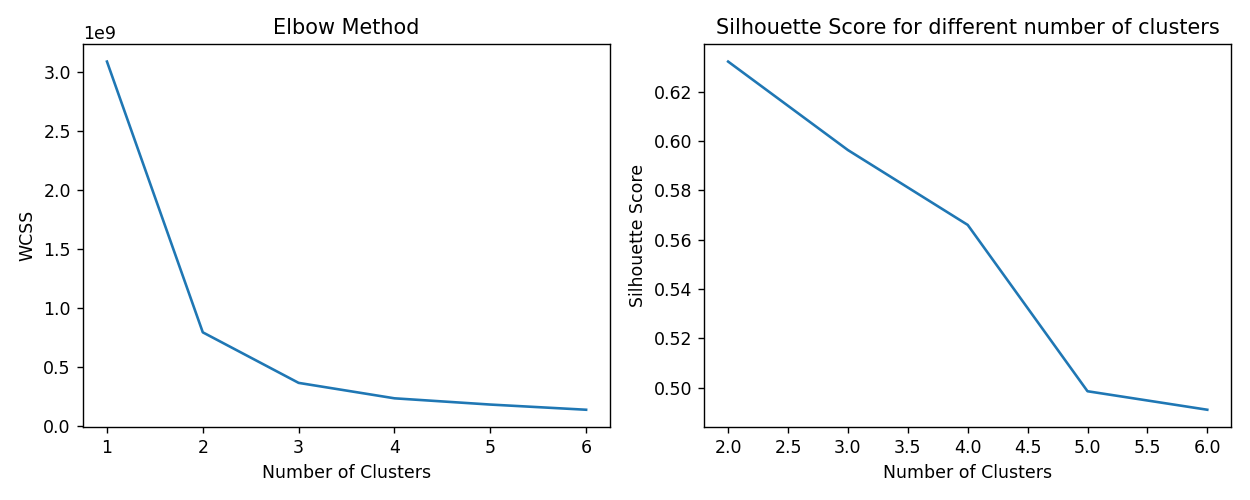

In [61]:
wcss = [] #Within-cluster Sum of squares
sil_score = []
cluster_range = range(1,7)

for i in range(1, 7):  # trying K from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init='auto', random_state=42)
    kmeans.fit(X_int)
    cluster_labels = kmeans.labels_
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS
    if i >1:
        sil_avg = silhouette_score(X_int, cluster_labels)
        sil_score.append(sil_avg)
# Plot the elbow curve
fig,ax =  plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ax[0].plot(cluster_range, wcss)
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('WCSS');



ax[1].plot(range(2,7), sil_score)
ax[1].set_title('Silhouette Score for different number of clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()

**So, 2 indeed looks like ideal number of sub-categories within the category of "intensive aid needed".**

In [62]:
#cluster number assignment using kmeans with 2 cluster number
kmeans_int = KMeans(n_clusters=2, n_init = 'auto',random_state= 42)

In [63]:
cluster_int = kmeans_int.fit_predict(X_int)
cluster_int

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [64]:
len(cluster_int)

108

In [65]:
len(df_int)

108

<IPython.core.display.Javascript object>


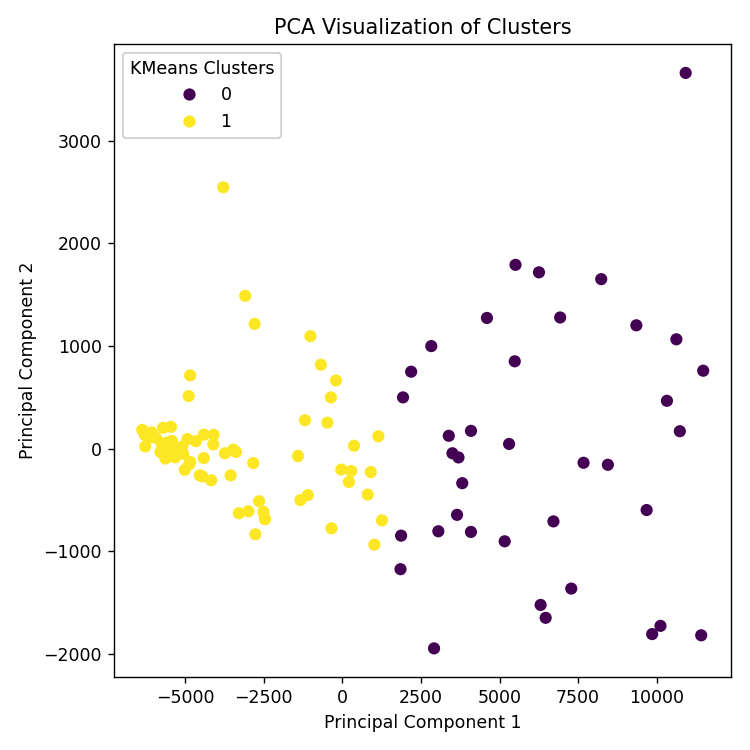

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))


# Scatter plot
scatter = ax.scatter(X_int[:, 0], X_int[:, 1], c = cluster_int, cmap='viridis')

# Labels and title
ax.set_title('PCA Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='KMeans Clusters')
ax.add_artist(legend)
plt.tight_layout()
plt.show()

In [67]:
df_int['cluster_int'] = cluster_int

In [68]:
df_int.groupby('cluster_int', axis=0).mean()

child_mort    exports    health    imports        income  \
cluster_int                                                             
0             23.705263  39.521053  6.470789  43.418421  11979.210526   
1             70.654286  29.857129  6.240571  46.689513   3342.185714   

             inflation  life_expec  total_fer         gdpp  
cluster_int                                                 
0             7.121000   72.571053   2.311842  5822.631579  
1            10.334943   63.307143   4.175571  1509.771429

In [69]:
cluster_labels = ['Intensive Aid Needed: Lower Priority', 'Intenside Aid Needed: Higher Priority']

# Replace values in the 'cluster' column with labels
df_int['cluster_int'] = df_int['cluster_int'].replace({0: cluster_labels[0], 1: cluster_labels[1]})


We see that although some features like "exports", "health", "imports","life_expec" and "total_fer" are similar. There is huge difference in "child_mort", "income" and "gdpp".

It will be benificial if the aid can focus on these factors where it is required more.

Let us make a world map of these countries with highlighting the different categories.

In [70]:
df_int.reset_index(inplace=True)

In [71]:
#plotting the countries
colorscale = ['rgb(255, 0, 0)', 'rgb(0, 0, 255)']
fig = px.choropleth(data_frame = df_int,
                   locations = 'country',
                   locationmode='country names',
                   color= 'cluster_int',
                   color_discrete_sequence=colorscale,
                   hover_name = 'country',
                   hover_data={'country': False},
                   labels = {'cluster_int':'Status'},
                   title = 'Categorization of Countries in need of Intensive Aid')
fig.show()

In [72]:
# Save the plot as an HTML file
fig.write_html("D:\\ML_projects\\CountryAid\\interactive_plot_countries_IntensiveAid.html")

In [73]:
from reportlab.lib.units import inch 
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle,PageTemplate
from reportlab.lib.styles import getSampleStyleSheet

In [74]:
grouped_countries1 = df1.groupby('cluster_kmeans')['country'].apply(list).to_dict()
grouped_countries2 = df_int.groupby('cluster_int')['country'].apply(list).to_dict()

#Define a filename
pdf_filename = 'KMeans clustering Countries.pdf'

#Create a PDF document
doc = SimpleDocTemplate('D:\\ML_projects\\CountryAid\\'+pdf_filename, pagesize = A4)


# Create a list to hold the flowables (elements) of the PDF
elements = []
# Define styles
styles = getSampleStyleSheet()
style_heading = styles['Heading1']
style_heading.fontName = 'Times-Bold' 
style_heading1 = styles['Heading2']
style_body = styles['Normal']

style_heading1.fontSize = 14  # Adjust font size as needed

# Define header content
header_content = 'Country Categories based on KMeans Clustering'
subheader_content = 'Intensive Aid Needed'
# Add header to each page
def add_header(canvas, doc):
    canvas.saveState()
    canvas.setFont('Times-Bold', 25)
    canvas.drawString(2 * inch, 10.8 * inch, header_content)
    canvas.restoreState()

# Add subheader to each page
def add_subheader(canvas, doc):
    canvas.saveState()
    canvas.setFont('Times-Bold', 20)
    canvas.drawString(1.05*inch, 10.2 * inch, subheader_content)
    canvas.restoreState() 

# Combine header and subheader addition
def add_header_and_subheader(canvas, doc):
    add_header(canvas, doc)
    add_subheader(canvas, doc)

doc.onFirstPage = add_header_and_subheader

# Add both header and subheader to the first page of the PDF document

cluster_country_list = list(grouped_countries1.items())[1:]

# Add sections for each cluster
for cluster, countries in grouped_countries2.items():
    # Add cluster heading
    elements.append(Spacer(1, 0.5 * inch))  # Add additional spacing after cluster heading
    elements.append(Paragraph(f"{cluster}", style_heading1))
    
    
    # Add countries under the cluster
    for country in countries:
        elements.append(Paragraph(f"- {country}", style_body))
    
    elements.append(Paragraph("<br/>", style_body))  # Add additional spacing after country list

# Add sections for each cluster
for cluster, countries in cluster_country_list:
    # Add cluster heading
    elements.append(Spacer(1, 0.5 * inch))  # Add additional spacing after cluster heading
    elements.append(Paragraph(f"{cluster}", style_heading))
    
    
    # Add countries under the cluster
    for country in countries:
        elements.append(Paragraph(f"- {country}", style_body))
    
    elements.append(Paragraph("<br/>", style_body))  # Add additional spacing after country list

# Build the PDF document
doc.build(elements)

### Answering some of the questions we brought up at the start.

#### Who are the stakeholders for this project?
- WHO WorldHelp team tasked with the aid assignment is stakeholder.

#### Are there any ethical concerns regarding this project?
- One possible ethical concern is a country that needs the big amount of aid but does not get much help due to error in the dataset or miscategorization due to our algorithm.
- One possible way to avoid this by making sure our dataset is from a reliable souce. We used multiple algorithms and check their efficiency in order to reduce the risk of mis-categorization.
#### What are the initial observations made when exploring the dataset?
- The dataset contains 9 features corresponding to 167 countries. These 9 features reflect socioeconomic and health status of the population in each country.
#### What are we trying to accomplish?
- We are trying to categorize countries based on their socioeconomic and healthcare status. This will allow WHO to distribute aid appropriately. 